In [15]:
import numpy as np
import matplotlib.pyplot as plt


In [16]:
np.random.seed(42)

days = 252                 # trading days in a year
num_stocks = 3             # number of companies
initial_price = 100        # starting stock price

mu = 0.0008                # average daily return
sigma = 0.02               # volatility (risk)


In [17]:
# daily returns for each stock
daily_returns = np.random.normal(mu, sigma, (days, num_stocks))

# cumulative returns
cumulative_returns = np.cumsum(daily_returns, axis=0)

# stock prices over time
stock_prices = initial_price * np.exp(cumulative_returns)


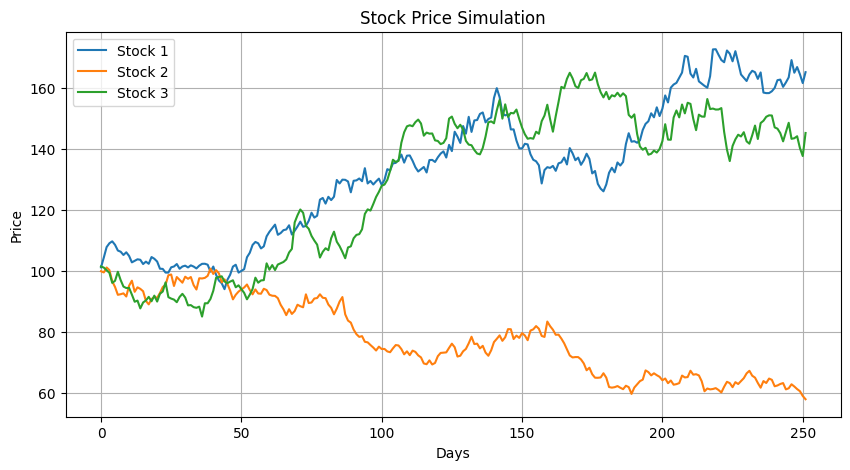

In [18]:
plt.figure(figsize=(10, 5))

for i in range(num_stocks):
    plt.plot(stock_prices[:, i], label=f"Stock {i+1}")

plt.title("Stock Price Simulation")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


In [19]:
returns = np.diff(stock_prices, axis=0) / stock_prices[:-1]


In [20]:
mean_returns = np.mean(returns, axis=0)
volatility = np.std(returns, axis=0)

for i in range(num_stocks):
    print(f"Stock {i+1} Mean Return: {mean_returns[i]:.5f}")
    print(f"Stock {i+1} Volatility : {volatility[i]:.5f}")
    print("-" * 30)


Stock 1 Mean Return: 0.00212
Stock 1 Volatility : 0.01798
------------------------------
Stock 2 Mean Return: -0.00197
Stock 2 Volatility : 0.02005
------------------------------
Stock 3 Mean Return: 0.00165
Stock 3 Volatility : 0.02107
------------------------------


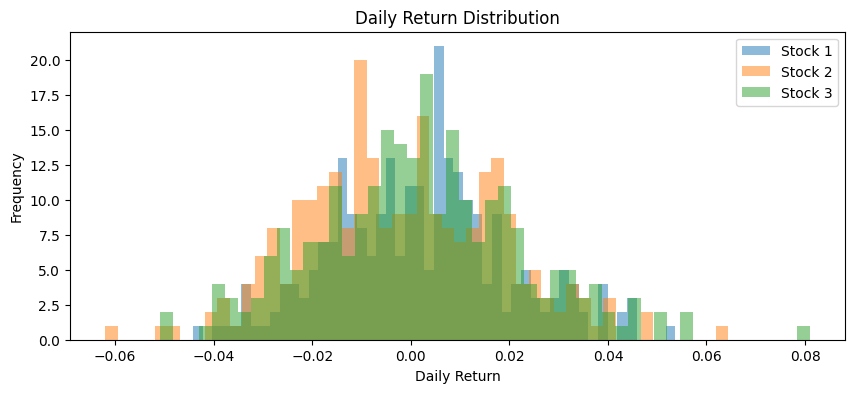

In [21]:
plt.figure(figsize=(10, 4))

for i in range(num_stocks):
    plt.hist(returns[:, i], bins=50, alpha=0.5, label=f"Stock {i+1}")

plt.title("Daily Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [22]:
window = 20

moving_avg = np.array([
    np.convolve(stock_prices[:, i], np.ones(window)/window, mode='valid')
    for i in range(num_stocks)
]).T


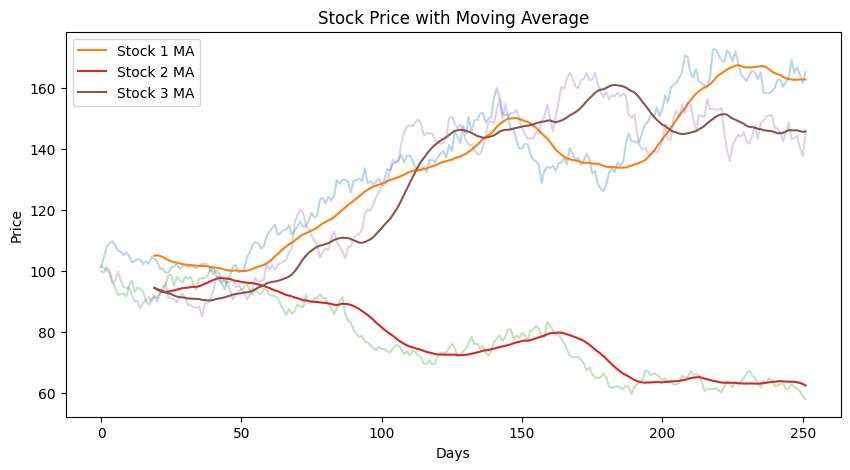

In [23]:
plt.figure(figsize=(10, 5))

for i in range(num_stocks):
    plt.plot(stock_prices[:, i], alpha=0.3)
    plt.plot(range(window-1, days), moving_avg[:, i], label=f"Stock {i+1} MA")

plt.title("Stock Price with Moving Average")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


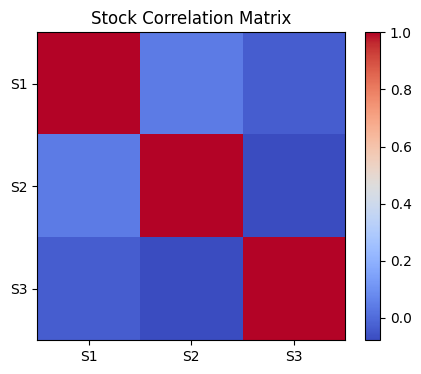

In [24]:
correlation_matrix = np.corrcoef(returns.T)

plt.figure(figsize=(5, 4))
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.title("Stock Correlation Matrix")
plt.xticks(range(num_stocks), [f"S{i+1}" for i in range(num_stocks)])
plt.yticks(range(num_stocks), [f"S{i+1}" for i in range(num_stocks)])
plt.show()


In [25]:
weights = np.array([0.4, 0.35, 0.25])

portfolio_returns = np.dot(returns, weights)
portfolio_value = initial_price * np.cumprod(1 + portfolio_returns)


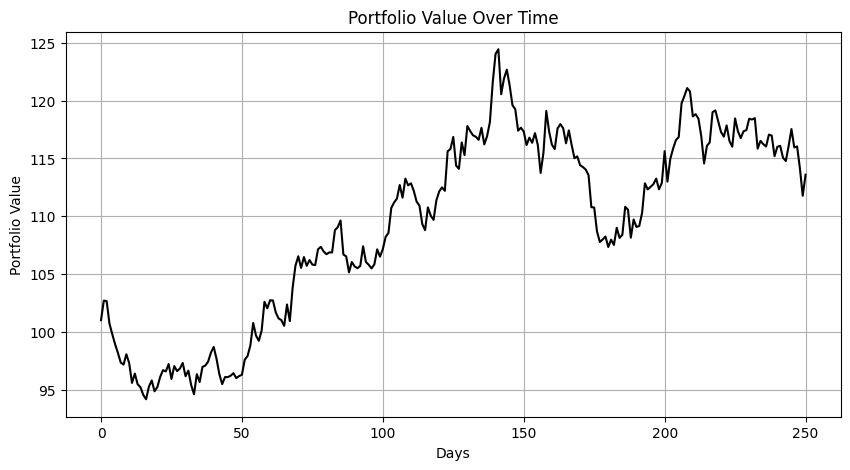

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(portfolio_value, color='black')
plt.title("Portfolio Value Over Time")
plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.grid()
plt.show()


In [27]:
portfolio_mean = np.mean(portfolio_returns)
portfolio_risk = np.std(portfolio_returns)

print("Portfolio Mean Return :", portfolio_mean)
print("Portfolio Risk       :", portfolio_risk)


Portfolio Mean Return : 0.0005701300311742197
Portfolio Risk       : 0.01115886024717599
